-------------

# **Big Sales Prediction using Random Forest Regressor**

## **Objective**

italicized text

## **Data Source**

## **Import Library**

In [2]:
import pandas as pd

In [3]:
import numpy as np

## **Import Data**

*italicized text*

In [4]:
df = pd.read_csv(r'https://raw.github.com/YBIFoundation/Dataset/main/Big%20Sales%20Data.csv')

In [5]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDG47,12.8,Low Fat,0.069606,Starchy Foods,261.9252,OUT035,2004,Small,Tier 2,Supermarket Type1,4984.178800
14200,FDG47,12.8,Low Fat,0.070013,Starchy Foods,262.8252,OUT017,2007,Medium,Tier 2,Supermarket Type1,2885.577200
14201,FDG47,12.8,Low Fat,0.069561,Starchy Foods,263.0252,OUT013,1987,High,Tier 3,Supermarket Type1,2885.577200
14202,FDG47,NaN,Low Fat,0.069282,Starchy Foods,263.5252,OUT027,1985,Medium,Tier 3,Supermarket Type3,3803.676434


In [6]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


## **Describe Data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [8]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11815.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.788355,0.065953,141.004977,1997.830681,2185.836320
std,4.654126,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,922.135101
50%,12.500000,0.054021,142.247000,1999.000000,1768.287680
75%,16.750000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


In [10]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,2389
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [11]:
df['Item_Weight'].fillna(df.groupby(['Item_Type'])['Item_Weight'].transform('mean'),inplace=True)

In [12]:
df.isna().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [13]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.790642,0.065953,141.004977,1997.830681,2185.836320
std,4.251186,0.051459,62.086938,8.371664,1827.479550
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,922.135101
50%,12.800000,0.054021,142.247000,1999.000000,1768.287680
75%,16.000000,0.094037,185.855600,2004.000000,2988.110400
max,30.000000,0.328391,266.888400,2009.000000,31224.726950


## **Data Visualization**

In [14]:
import seaborn as sns


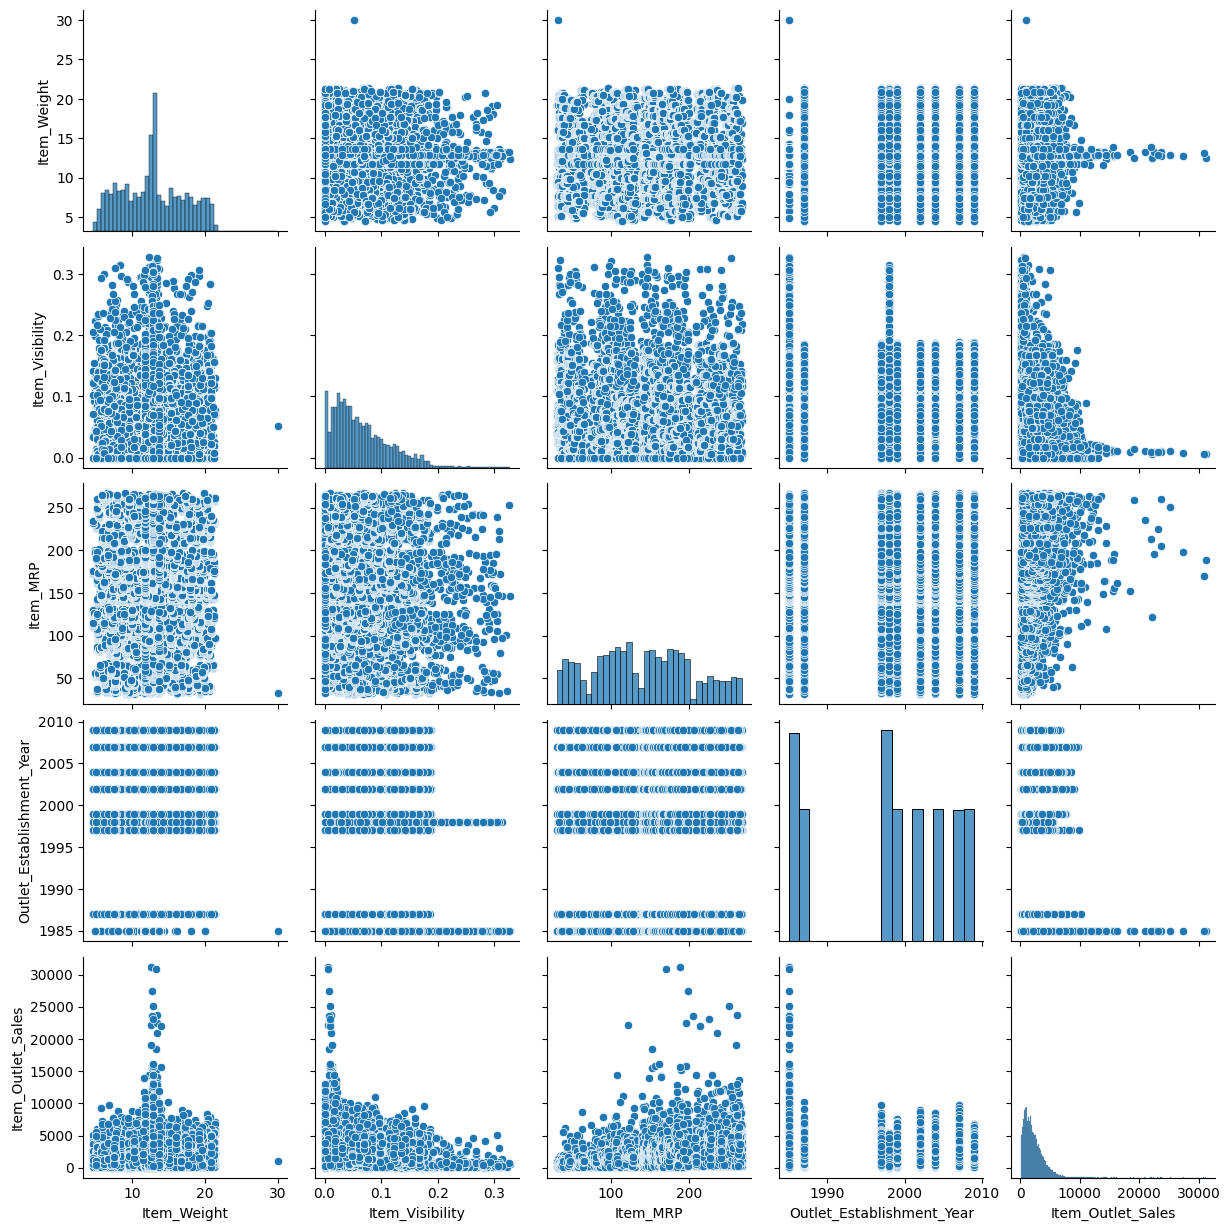

In [15]:
sns.pairplot(df)

## **Data Preprocessing**

In [16]:
df[['Item_Identifier']].value_counts()

,count
Item_Identifier,
FDQ08,10
FDO24,10
FDQ19,10
FDQ28,10
FDQ31,10
FDQ37,10
FDQ40,10
FDQ45,10
FDQ47,10


In [17]:
df[['Item_Fat_Content']].value_counts()

,count
Item_Fat_Content,
Low Fat,8485
Regular,4824
LF,522
reg,195
low fat,178


In [18]:
df.replace({'Item_Fat_Content':{'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'}}, inplace=True)

In [19]:
df[['Item_Fat_Content']].value_counts()

,count
Item_Fat_Content,
Low Fat,9185
Regular,5019


In [20]:
df.replace({'Item_Fat_Content': {'Low Fat':0,'Regular':1}},inplace=True)

In [21]:
df[['Item_Fat_Content']].value_counts()

,count
Item_Fat_Content,
0,9185
1,5019


In [22]:
df[['Item_Type']].value_counts()

,count
Item_Type,
Fruits and Vegetables,2013
Snack Foods,1989
Household,1548
Frozen Foods,1426
Dairy,1136
Baking Goods,1086
Canned,1084
Health and Hygiene,858
Meat,736


In [66]:
df.replace({'Item_Type': {'Fruits and Vegetables':0, 'Snack Foods':0, 'Household':1,
            'Frozen Foods':0, 'Dairy':0, 'Baking Goods':0,
             'Canned':0, 'Health and Hygiene':1,
              'Meat':0, 'Soft Drinks':0, 'Breads':0, 'Hard Drinks':0,
              'Others':2, 'Starchy Foods':0, 'Breakfast':0, 'Seafood':0
            }},inplace=True)

In [67]:
df[['Item_Type']].value_counts()

,count
Item_Type,
0,11518
1,2406
2,280


In [68]:
df[['Outlet_Identifier']].value_counts()

,count
Outlet_Identifier,
0,1559
1,1553
2,1550
3,1550
4,1550
5,1548
6,1546
7,1543
8,925


In [69]:
df.replace({'Outlet_Identifier': {'OUT027':0, 'OUT013':1, 'OUT035':2,
                                  'OUT046':3, 'OUT049':4, 'OUT045':5,
                                  'OUT018':6, 'OUT017':7, 'OUT010':8,
                                  'OUT019':9}

},inplace=True)

In [70]:
df[['Outlet_Identifier']].value_counts()

,count
Outlet_Identifier,
0,1559
1,1553
2,1550
3,1550
4,1550
5,1548
6,1546
7,1543
8,925


In [71]:
df[['Outlet_Size']].value_counts()

,count
Outlet_Size,
1,7122
0,5529
2,1553


In [72]:
df.replace({'Outlet_Size': {'Small':0, 'Medium':1, 'High':2}}, inplace=True)

In [73]:
df[['Outlet_Size']].value_counts()

,count
Outlet_Size,
1,7122
0,5529
2,1553


In [74]:
df[['Outlet_Location_Type']].value_counts()

,count
Outlet_Location_Type,
2,5583
1,4641
0,3980


In [75]:
df.replace({'Outlet_Location_Type': {'Tier 1':0, 'Tier 2':1, 'Tier 3':2}}, inplace=True)

In [76]:
df[['Outlet_Location_Type']].value_counts()

,count
Outlet_Location_Type,
2,5583
1,4641
0,3980


In [77]:
df[['Outlet_Type']].value_counts()

,count
Outlet_Type,
1,9294
0,1805
3,1559
2,1546


In [78]:
df.replace({'Outlet_Type': {'Grocery Store':0, 'Supermarket Type1':1,
                            'Supermarket Type2':2, 'Supermarket Type3':3}}, inplace=True)

In [79]:
df[['Outlet_Type']].value_counts()

,count
Outlet_Type,
1,9294
0,1805
3,1559
2,1546


In [80]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,0,0.111448,0,33.4874,4,1999,1,0,1,436.608721
1,FDT36,12.3,0,0.111904,0,33.9874,7,2007,1,1,1,443.127721
2,FDT36,12.3,0,0.111728,0,33.9874,6,2009,1,2,2,564.598400
3,FDT36,12.3,0,0.000000,0,34.3874,9,1985,0,0,0,1719.370000
4,FDP12,9.8,1,0.045523,0,35.0874,7,2007,1,1,1,352.874000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  int64  
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  int64  
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  int64  
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  int64  
 9   Outlet_Location_Type       14204 non-null  int64  
 10  Outlet_Type                14204 non-null  int64  
 11  Item_Outlet_Sales          14204 non-null  float64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.3+ MB


In [82]:
df.shape

(14204, 12)

## **Define Target Variable (y) and Feature Variables (X)**

In [83]:
y = df['Item_Outlet_Sales']

In [84]:
y.shape

(14204,)

In [85]:
y

,Item_Outlet_Sales
0,436.608721
1,443.127721
2,564.598400
3,1719.370000
4,352.874000
5,458.736200
6,299.335072
7,988.047200
8,335.563200
9,846.897600


In [86]:
x = df[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]


In [87]:
x.shape

(14204, 10)

In [88]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,0,0.111448,0,33.4874,4,1999,1,0,1
1,12.300000,0,0.111904,0,33.9874,7,2007,1,1,1
2,12.300000,0,0.111728,0,33.9874,6,2009,1,2,2
3,12.300000,0,0.000000,0,34.3874,9,1985,0,0,0
4,9.800000,1,0.045523,0,35.0874,7,2007,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0,0.069606,0,261.9252,2,2004,0,1,1
14200,12.800000,0,0.070013,0,262.8252,7,2007,1,1,1
14201,12.800000,0,0.069561,0,263.0252,1,1987,2,2,1
14202,13.659758,0,0.069282,0,263.5252,0,1985,1,2,3


In [47]:
# or use- .drop funtion to define x

In [89]:
x=df.drop(['Item_Identifier','Item_Outlet_Sales'],axis=1)

In [90]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,12.300000,0,0.111448,0,33.4874,4,1999,1,0,1
1,12.300000,0,0.111904,0,33.9874,7,2007,1,1,1
2,12.300000,0,0.111728,0,33.9874,6,2009,1,2,2
3,12.300000,0,0.000000,0,34.3874,9,1985,0,0,0
4,9.800000,1,0.045523,0,35.0874,7,2007,1,1,1
...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0,0.069606,0,261.9252,2,2004,0,1,1
14200,12.800000,0,0.070013,0,262.8252,7,2007,1,1,1
14201,12.800000,0,0.069561,0,263.0252,1,1987,2,2,1
14202,13.659758,0,0.069282,0,263.5252,0,1985,1,2,3


In [91]:
x.shape

(14204, 10)

## **Train Test Split**

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
sc = StandardScaler()

In [92]:
x_std = df[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']]

In [93]:
x_std = sc.fit_transform(x_std)

In [94]:
x_std

array([[-0.11541705,  0.88413635, -1.73178716,  0.13968068],
       [-0.11541705,  0.89300616, -1.72373366,  1.09531886],
       [-0.11541705,  0.88958331, -1.72373366,  1.3342284 ],
       ...,
       [ 0.00220132,  0.07011952,  1.96538148, -1.29377659],
       [ 0.20444792,  0.06469366,  1.97343499, -1.53268614],
       [ 0.00220132,  0.07334891,  1.97504569,  0.13968068]])

In [95]:
x[['Item_weight', 'Item_Visibilty', 'Item_MRP', 'Outlet_Establishment_Year']] = pd.DataFrame(x_std, columns=['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year'])

In [96]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_weight,Item_Visibilty
0,12.300000,0,0.111448,0,-1.731787,4,0.139681,1,0,1,-0.115417,0.884136
1,12.300000,0,0.111904,0,-1.723734,7,1.095319,1,1,1,-0.115417,0.893006
2,12.300000,0,0.111728,0,-1.723734,6,1.334228,1,2,2,-0.115417,0.889583
3,12.300000,0,0.000000,0,-1.717291,9,-1.532686,0,0,0,-0.115417,-1.281712
4,9.800000,1,0.045523,0,-1.706016,7,1.095319,1,1,1,-0.703509,-0.397031
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,12.800000,0,0.069606,0,1.947664,2,0.736955,0,1,1,0.002201,0.070990
14200,12.800000,0,0.070013,0,1.962160,7,1.095319,1,1,1,0.002201,0.078898
14201,12.800000,0,0.069561,0,1.965381,1,-1.293777,2,2,1,0.002201,0.070120
14202,13.659758,0,0.069282,0,1.973435,0,-1.532686,1,2,3,0.204448,0.064694


In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.1,random_state=2529)

In [99]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1420, 12), (12784, 12), (1420,), (12784,))

## **Modeling**

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rfr = RandomForestRegressor(random_state=2529)

In [102]:
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=2529)

In [103]:
y_pred = rfr.predict(x_test)

In [104]:
y_pred.shape

(12784,)

In [105]:
y_pred

array([1254.58796849, 1132.21954231, 1672.09280265, ...,  670.14262222,
       1966.81449158, 3023.98480608])

## **Model Evaluation**

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [107]:
mean_squared_error(y_test,y_pred)

1847168.9937867695

In [108]:
mean_absolute_error(y_test,y_pred)

843.5757137100778

In [109]:
r2_score(y_test,y_pred)

0.4531712417612458

## **Prediction**

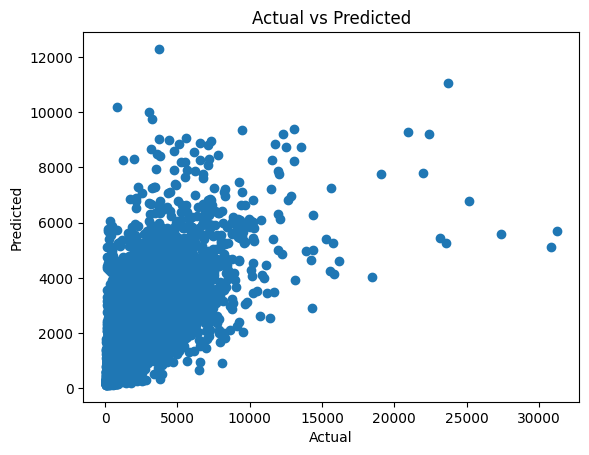

In [110]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

## **Explaination**